# Relaciones lineales

In [1]:
from sklearn.datasets import load_wine
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
LW=load_wine()
data=LW.data
names=LW.feature_names
df=pd.DataFrame(data=data,columns=names)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


## Relación entre `flavanoids` y `ash`

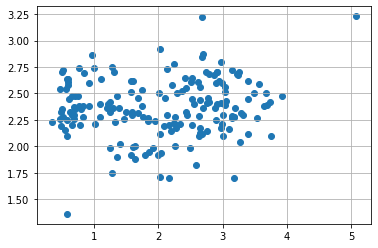

In [3]:
# Gráfica flavanoids vs ash
plt.scatter(df['flavanoids'],df['ash'])
plt.grid()

## Relación entre `alcalinity_of_ash` y `ash`

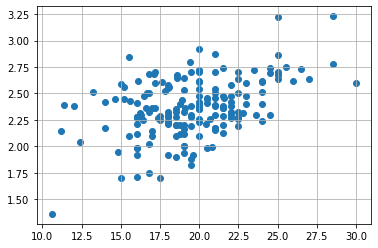

In [4]:
# Gráfica alcalinity_of_ash vs ash
plt.scatter(df['alcalinity_of_ash'],df['ash'])
plt.grid()

In [5]:
minimize?

🏃 Encontrar la mejor función lineal que relacione a las variables

In [6]:
# Definimos 'fun', el criterio de minimizacion
def fun(a,x,y):
  f=a[0]+a[1]*x
  return np.mean((f-y)**2)

In [7]:
# Flavanoids vs ash
a0=np.random.rand(2) # Arreglo de dos elementos aleatorio uniformemente distribuído entre 0 y 1
sol=minimize(fun,a0,args=(df.flavanoids,df.ash))
sol

      fun: 0.07385068681549015
 hess_inv: array([[ 2.46801289, -0.97903779],
       [-0.97903779,  0.48621103]])
      jac: array([ 5.26010990e-06, -1.50036067e-06])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 7
     njev: 8
   status: 0
  success: True
        x: array([2.30239318, 0.03160068])

La ecuación encontrada es 
$$
y=2.3+0.032x.
$$
Con $mse=0.07385$.

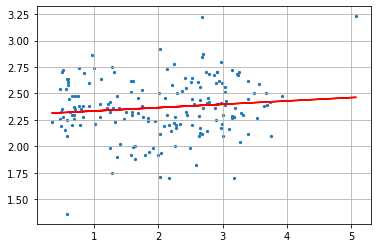

In [8]:
plt.scatter(df.flavanoids,df.ash,s=5)
x=df.flavanoids
a=sol.x
f=a[0]+a[1]*x
plt.plot(x,f,'r')
plt.grid()

In [9]:
# Función lineal que relaciona Ash vs su alcalinidad
sol2=minimize(fun,a0,args=(df.alcalinity_of_ash,df.ash))
sol2

      fun: 0.06012981364539361
 hess_inv: array([[17.63488706, -0.87894006],
       [-0.87894006,  0.04508554]])
      jac: array([ 0.00000000e+00, -9.31322575e-10])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 4
     njev: 7
   status: 0
  success: True
        x: array([1.65646788, 0.03642221])

La ecuación que relaciona `alcalinity_of_ash` con `ash` es 
$$
y=1.656+0.036x.
$$
Con $mse=0.06013$.

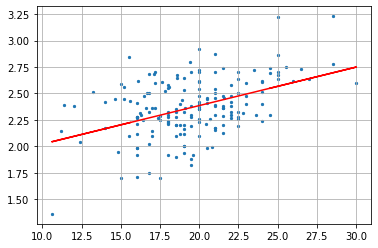

In [10]:
x=df.alcalinity_of_ash
plt.scatter(x,df.ash,s=5)
a=sol2.x
f=a[0]+a[1]*x
plt.plot(x,f,'r')
plt.grid()

## Relación lineal entre `ash` vs (`alcalinity_of_ash` y `flavanoids`)

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
lin=LinearRegression()

In [13]:
X=df[['alcalinity_of_ash']]
X.shape

(178, 1)

In [14]:
X=df['alcalinity_of_ash']
X.shape

(178,)

In [15]:
lin.fit(df[['alcalinity_of_ash']],df['ash'])

LinearRegression()

In [16]:
lin.coef_

array([0.03642246])

In [17]:
lin.intercept_

1.6564630207373274

In [19]:
sol2.x

array([1.65646788, 0.03642221])

In [21]:
lin.score(df[['alcalinity_of_ash']],df['ash']) # Buscamos que se acerque a 1  :(

0.19657446211131158

In [34]:
# Ajuste lineal multivariable
#
# y=a[0]+a[1]*x1+a[2]*x2
lin.fit(df[['flavanoids','alcalinity_of_ash']],df['ash'])

LinearRegression()

In [23]:
lin.coef_

array([0.08487309, 0.04534213])

In [24]:
lin.intercept_

1.3103441672107299

In [25]:
lin.score?

In [33]:
lin.score(df[['flavanoids','alcalinity_of_ash']],df['ash'])

0.2802750447149793

In [ ]:
X=df[['flavanoids','alcalinity_of_ash']]
f=lin.predict(X)

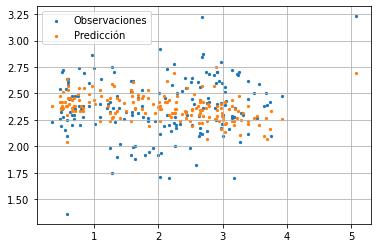

In [31]:
# Proyección de la gráfica sobre flavanoids
plt.scatter(df.flavanoids,df.ash,s=5,label='Observaciones')
plt.scatter(df.flavanoids,f,s=5,label='Predicción')
plt.legend()
plt.grid()

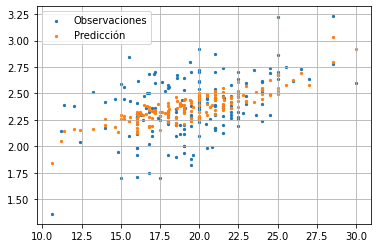

In [38]:
# Proyección de la gráfica sobre alcalinity_of_ash
x=df.alcalinity_of_ash
plt.scatter(x,df.ash,s=5,label='Observaciones')
f=lin.predict(df[['flavanoids','alcalinity_of_ash']])
plt.scatter(x,f,s=5,label='Predicción')
plt.legend()
plt.grid()